In [1]:
import sys
sys.path.append('/home/dnclab/env/mi333/lib/python3.8/site-packages')

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [3]:
def rargmax(vector):
    m = np.amax(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)


In [4]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
)

env = gym.make('FrozenLake-v3')

## Dummy Q-Learning (deterministic)

In [5]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

num_episodes = 2000

rList = []
for i in range(num_episodes):
    state=env.reset()
    rAll = 0
    done = False

    # Q-Learning Algorithm
    while not done:
        action = rargmax(Q[state, :])

        new_state, reward, done, _ = env.step(action)

        Q[state, action] = reward + np.max(Q[new_state,:])

        rAll += reward
        state = new_state
    rList.append(rAll)

Success rate: 0.9345
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


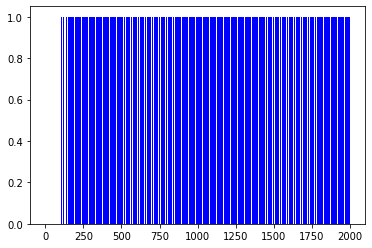

In [6]:
print("Success rate: "+str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

## Exploration & Exploitation + Discount Vector (deterministic)

In [9]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.9
num_episodes = 2000

rList = []
for i in range(num_episodes):
    state=env.reset()
    rAll = 0
    done = False

    # e-greedy value
    e = 1.0 / ((i//100)+1)
    
    # Q-Learning Algorithm
    while not done:
        # 1) Noise
        #action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))

        # 2) E-Greedy
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        
        new_state, reward, done, _ = env.step(action)

        # Discount Vector(Decay)
        Q[state, action] = reward + dis*np.max(Q[new_state,:])

        rAll += reward
        state = new_state
    rList.append(rAll)

Success rate: 0.809
Final Q-Table Values
LEFT DOWN RIGHT UP
[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]


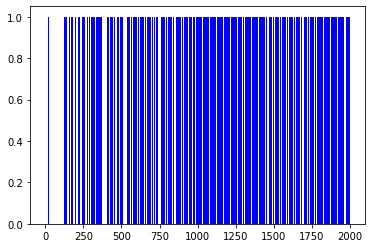

In [10]:
print("Success rate: "+str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

## Stochastic (non-deterministic, learning-rate)


In [21]:
env = gym.make('FrozenLake-v0')

Q = np.zeros([env.observation_space.n, env.action_space.n])

learning_rate = 0.85
dis = 0.9
num_episodes = 2000

DeprecatedEnv: Environment version `v0` for `FrozenLake` is deprecated. Please use the latest version `v1`.

In [22]:
rList = []
for i in range(num_episodes):
    state=env.reset()
    rAll = 0
    done = False

    # e-greedy value
    e = 1.0 / ((i//100)+1)
    
    # Q-Learning Algorithm
    while not done:
        # 1) Noise
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))

        # 2) E-Greedy
#         if np.random.rand(1) < e:
#             action = env.action_space.sample()
#         else:
#             action = np.argmax(Q[state, :])
        
        new_state, reward, done, _ = env.step(action)

        # Discount Vector(Decay)
        Q[state, action] = (1-learning_rate) * Q[state,action] \
                            + learning_rate * (reward + dis*np.max(Q[new_state,:]))

        rAll += reward
        state = new_state
    rList.append(rAll)

Success rate: 0.5635
Final Q-Table Values
LEFT DOWN RIGHT UP
[[1.02549294e-01 1.62115566e-03 1.03100738e-03 3.62552963e-03]
 [5.34468288e-06 4.49481962e-05 7.76748584e-04 5.90427924e-02]
 [9.95756400e-03 2.43898062e-04 1.16856332e-03 6.81098442e-04]
 [2.29512991e-04 1.33243794e-05 1.00279059e-04 1.30879471e-03]
 [2.63466892e-01 9.28577879e-07 5.55680234e-05 2.48002874e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.56294326e-04 1.60069005e-07 3.96022030e-06 2.37246696e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.54501071e-05 6.13842546e-05 7.64098362e-07 1.60483826e-01]
 [5.06187973e-04 6.14507951e-01 2.05496402e-04 2.66480860e-04]
 [7.73443341e-01 2.58002109e-04 3.29084349e-04 4.52618397e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16299521e-03 1.14293937e-02 8.79812902e-01 3.32726958e-03]
 [2.51369303e-02 9.99735734e-01 4.74177991e-02 2.31047668

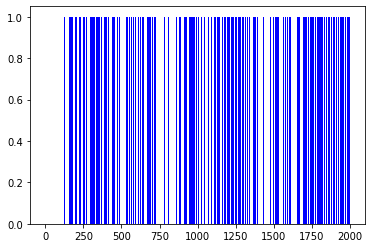

In [23]:
print("Success rate: "+str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()